In [1]:
from dataclasses import dataclass

import matplotlib.pyplot as plt
import numpy as np
from flying_discs.morrison.base import MorrisonBaseCalculator
from flying_discs.morrison.bezier import MorrisonBezierCalculator
from flying_discs.morrison.constants import MorrisonUltrastar, MorrisonUltrastarCode
from flying_discs.morrison.linear import MorrisonLinearCalculator, MorrisonPosition3D

# Base

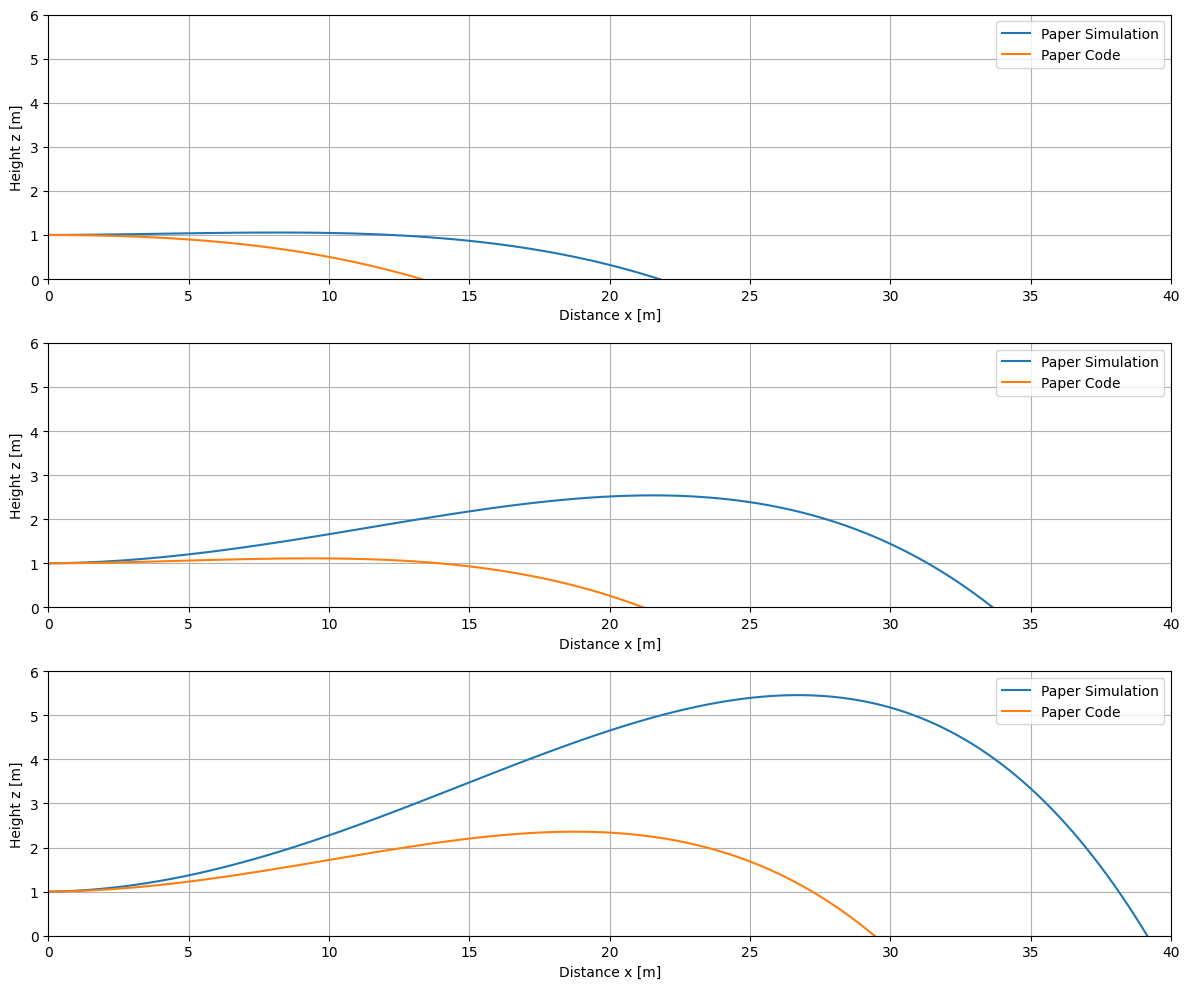

In [2]:
@dataclass
class Experiment:
    angle_of_attack: float
    v0: float
    direction = 0
    deltaT = 0.033


experiments = [Experiment(5, 14), Experiment(7.5, 14), Experiment(10, 14)]
fig = plt.figure(figsize=(12, 10))
for i, experiment in enumerate(experiments):
    disc = MorrisonBaseCalculator(MorrisonUltrastar())
    throw = disc.calculate_trajectory(1, experiment.v0, experiment.angle_of_attack, experiment.deltaT)
    ax = fig.add_subplot(3, 1, i + 1)
    ax.plot(throw.trajectory.X, throw.trajectory.Z, label="Paper Simulation")

    disc = MorrisonBaseCalculator(MorrisonUltrastarCode())
    throw = disc.calculate_trajectory(1, experiment.v0, experiment.angle_of_attack, experiment.deltaT)
    ax.plot(throw.trajectory.X, throw.trajectory.Z, label="Paper Code")

    ax.set_xlim([0, 40])
    ax.set_ylim([0, 6])
    ax.set_xlabel("Distance x [m]")
    ax.set_ylabel("Height z [m]")
    ax.grid()
    ax.legend()
plt.tight_layout()
plt.show()

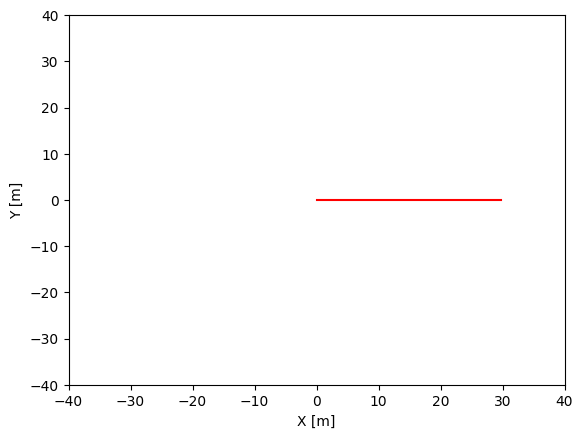

In [3]:
plt.plot(throw.trajectory.X, np.zeros(len(throw.trajectory)), color="red")
plt.xlim([-40, 40])
plt.ylim([-40, 40])
plt.xlabel("X [m]")
plt.ylabel("Y [m]")
plt.show()

# Linear

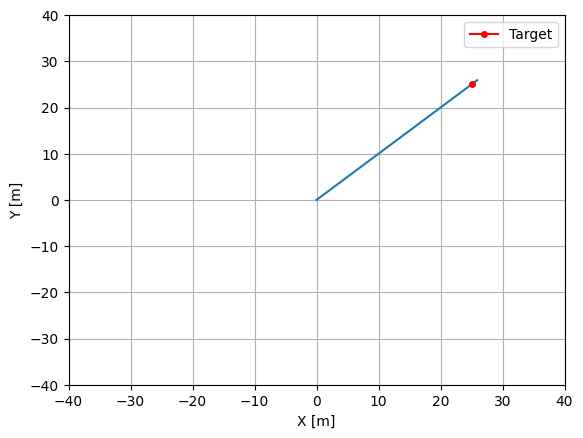

In [4]:
TARGET_X = 25
TARGET_Y = 25

disc = MorrisonLinearCalculator(MorrisonUltrastar())
initial_position = MorrisonPosition3D(0, 0, 1, 0, 0, 0, 0, 0, 0)
angle_of_attack = 2.5
deltaT = 0.033
throw = disc.calculate_trajectory_to_position(initial_position, angle_of_attack, TARGET_X, TARGET_Y, deltaT)

plt.plot(throw.trajectory.X, throw.trajectory.Y)
plt.plot([TARGET_X], [TARGET_Y], marker="o", markersize=4, color="red", label="Target")
plt.xlim([-40, 40])
plt.ylim([-40, 40])
plt.xlabel("X [m]")
plt.ylabel("Y [m]")
plt.legend()
plt.grid()
plt.show()

# Bezier

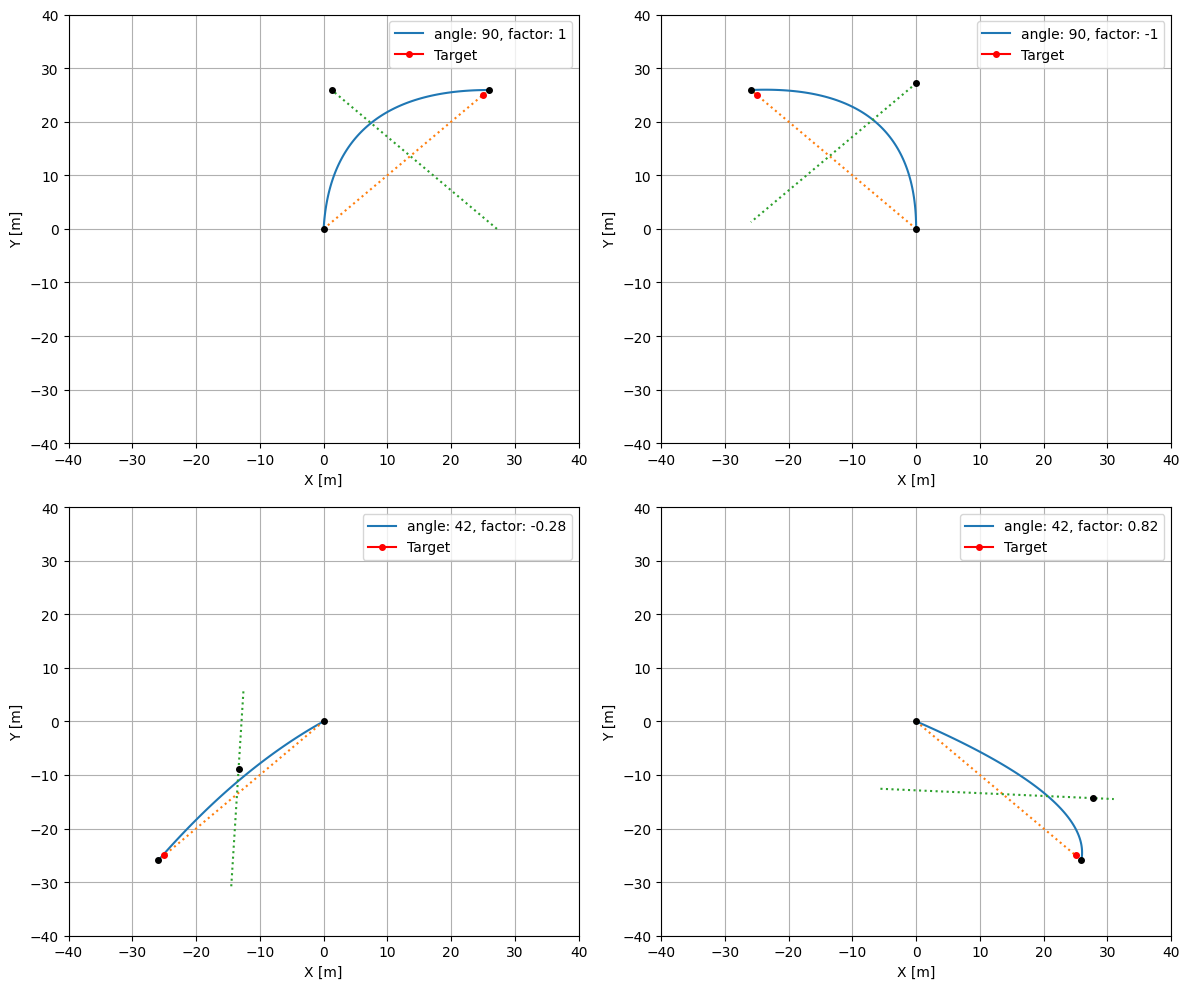

In [5]:
@dataclass
class BezierExperiment:
    rotation_angle: float
    factor: float
    target_x: float
    target_y: float


bezier_experiments = [
    BezierExperiment(90, 1, TARGET_X, TARGET_Y),
    BezierExperiment(90, -1, -TARGET_X, TARGET_Y),
    BezierExperiment(42, -0.28, -TARGET_X, -TARGET_Y),
    BezierExperiment(42, 0.82, TARGET_X, -TARGET_Y),
]

fig = plt.figure(figsize=(12, 10))
for i, bezier_experiment in enumerate(bezier_experiments):
    disc = MorrisonBezierCalculator(MorrisonUltrastar())
    initial_position = MorrisonPosition3D(0, 0, 1, 0, 0, 0, 0, 0, 0)
    angle_of_attack = 2.5
    deltaT = 0.033
    throw = disc.calculate_trajectory_to_position(
        initial_position,
        angle_of_attack,
        bezier_experiment.rotation_angle,
        bezier_experiment.factor,
        bezier_experiment.target_x,
        bezier_experiment.target_y,
        deltaT,
    )
    ax = fig.add_subplot(2, 2, i + 1)
    ax.plot(
        throw.trajectory.X,
        throw.trajectory.Y,
        label=f"angle: {str(bezier_experiment.rotation_angle)}, factor: {str(bezier_experiment.factor)}",
    )

    ax.plot(throw.extras.linear_trajectory.X, throw.extras.linear_trajectory.Y, linestyle="dotted")
    ax.plot([p[0] for p in throw.extras.intersect], [p[1] for p in throw.extras.intersect], linestyle="dotted")
    for point in throw.extras.bezier_points:
        ax.plot([point[0]], [point[1]], marker="o", markersize=4, color="black")
    ax.plot(
        [bezier_experiment.target_x],
        [bezier_experiment.target_y],
        marker="o",
        markersize=4,
        color="red",
        label="Target",
    )
    ax.set_xlim([-40, 40])
    ax.set_ylim([-40, 40])
    ax.set_xlabel("X [m]")
    ax.set_ylabel("Y [m]")
    ax.grid()
    ax.legend()
plt.tight_layout()
plt.show()